# Frequency analysis - Sqrt

Matteo Bortoletto, Clelia Corridori, Filippo Costa, Edoardo Spadetto

Group: Rag√π

## Step 1. Find nitrogenous base frequencies

In [1]:
import os
from Bio import SeqIO
from Bio.Seq import Seq

os.chdir('/home/ubuntu/data')

intr_file = 'hg19_intr_clean.fa'
depl_file = 'hg19_depl_clean.fa'

e = 0
intr_seqs = []
depl_seqs = []
for intr, depl in zip(SeqIO.parse(intr_file, 'fasta'), SeqIO.parse(depl_file, 'fasta')):
    
    cutoff = 500
    my_intr_seq = str(intr.seq)[0:cutoff]
    my_depl_seq = str(depl.seq)[0:cutoff]
    
    intr_seqs.append(my_intr_seq)
    
    depl_seqs.append(my_depl_seq)

    e = e + 1
    if e%20000 == 0:
        print('Finished ' + str(e) + ' entries')

Finished 20000 entries
Finished 40000 entries
Finished 60000 entries


In [2]:
def getKmers(sequence, size):
    return [sequence[x:x+size].upper() for x in range(len(sequence) - size + 1)]

In [3]:
kmer = 1

print('Building Neanderthal introgressed sequences')
intr_sentences = []
for i in range(len(intr_seqs)):
    intr_sentences.append(getKmers(intr_seqs[i], kmer))

print('Building Neanderthal depleted sequences')
depl_sentences = []
for i in range(len(depl_seqs)):
    depl_sentences.append(getKmers(depl_seqs[i], kmer))

Building Neanderthal introgressed sequences
Building Neanderthal depleted sequences


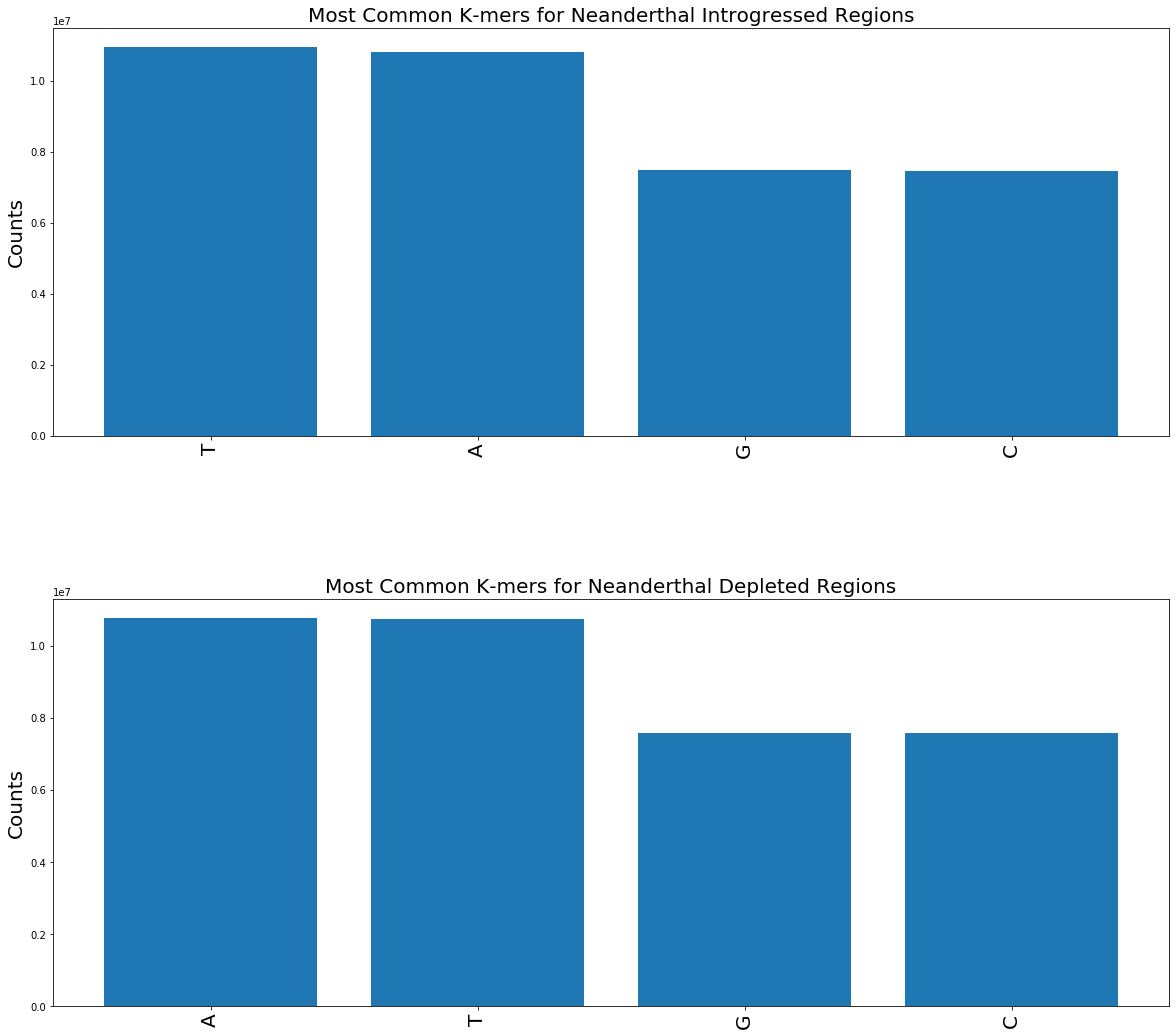

In [4]:
from collections import Counter
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,18))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

plt.subplot(2, 1, 1)
D_intr = dict(Counter([item for sublist in intr_sentences for item in sublist]).most_common(20))
plt.bar(range(len(D_intr)), list(D_intr.values()), align='center')
plt.title('Most Common K-mers for Neanderthal Introgressed Regions', fontsize = 20)
plt.ylabel("Counts", fontsize = 20)
plt.xticks(rotation = 90)
plt.xticks(range(len(D_intr)), list(D_intr.keys()), fontsize = 20)

D_intr_c=dict(Counter([item for sublist in intr_sentences for item in sublist]))

plt.subplot(2, 1, 2)
D_depl = dict(Counter([item for sublist in depl_sentences for item in sublist]).most_common(20))
plt.bar(range(len(D_depl)), list(D_depl.values()), align='center')
plt.title('Most Common K-mers for Neanderthal Depleted Regions', fontsize = 20)
plt.ylabel("Counts", fontsize = 20)
plt.xticks(rotation = 90)
plt.xticks(range(len(D_depl)), list(D_depl.keys()), fontsize = 20)

D_depl_c=dict(Counter([item for sublist in intr_sentences for item in sublist]))
               
plt.show()

## Step 2. Find the most predictive words based on frequency

In [5]:
kmer = 10

print('Building Neanderthal introgressed sequences')
intr_sentences = []
for i in range(len(intr_seqs)):
    intr_sentences.append(getKmers(intr_seqs[i], kmer))

print('Building Neanderthal depleted sequences')
depl_sentences = []
for i in range(len(depl_seqs)):
    depl_sentences.append(getKmers(depl_seqs[i], kmer))

Building Neanderthal introgressed sequences
Building Neanderthal depleted sequences


In [6]:
import pandas as pd

intr_counts = dict(Counter([item for sublist in intr_sentences for item in sublist]))
kmers = list(intr_counts.keys())
counts = list(intr_counts.values())
intr_df = pd.DataFrame({'Kmer': kmers, 'Count': counts})
intr_df = intr_df.sort_values(['Count'], ascending = False)
intr_df.head(10)

Kmer  Count
37228  TTTTTTTTTT  37802
24801  AAAAAAAAAA  21204
26794  TGTGTGTGTG   8106
26793  GTGTGTGTGT   8098
8264   CACACACACA   7152
60375  ACACACACAC   7062
26804  ATATATATAT   4771
26803  TATATATATA   4623
18937  TGTAATCCCA   4075
41207  CTTTTTTTTT   4038

In [7]:
depl_counts = dict(Counter([item for sublist in depl_sentences for item in sublist]))
kmers = list(depl_counts.keys())
counts = list(depl_counts.values())
depl_df = pd.DataFrame({'Kmer': kmers, 'Count': counts})
depl_df = depl_df.sort_values(['Count'], ascending = False)
depl_df.head(10)

Kmer  Count
17916  AAAAAAAAAA  39256
1597   TTTTTTTTTT  38250
6814   TGTGTGTGTG   7799
19201  CACACACACA   7679
6815   GTGTGTGTGT   7648
64805  ACACACACAC   7590
3893   TGTAATCCCA   5847
716    ATATATATAT   5807
3895   TAATCCCAGC   5717
717    TATATATATA   5700

In [8]:
import numpy as np

merge_df = pd.merge(intr_df, depl_df, on = 'Kmer')
merge_df.columns = ['Kmer','Count_Intr','Count_Depl']
merge_df['Difference_overSqrtSum'] = (merge_df['Count_Depl'] - merge_df['Count_Intr']) / (np.sqrt(merge_df['Count_Depl']) + np.sqrt(merge_df['Count_Intr']))

In [9]:
sorted_merge_df = merge_df.sort_values(['Difference_overSqrtSum'], ascending = False)
sorted_merge_df['PredictPower'] = abs(sorted_merge_df['Difference_overSqrtSum'])
sorted_merge_df.head(15)

Kmer  Count_Intr  Count_Depl  Difference_overSqrtSum  \
1       AAAAAAAAAA       21204       39256               52.515336   
333725  CATTCCATTC          39         729               20.755002   
216224  ATTCCATTCC          55         751               19.988181   
270     TCTCAAAAAA        1374        3211               19.598180   
176095  TCCATTCCAT          62         746               19.438993   
133055  CCATTCCATT          72         748               18.864307   
301     CTCAAAAAAA        1286        2960               18.545040   
139     TCCAGCCTGG        2036        3932               17.583605   
66101   TTCCATTCCA          98         753               17.541351   
84      CCAGCCTGGG        2382        4396               17.496600   
523     GTCTCAAAAA         965        2337               17.278079   
160     TGCACTCCAG        1922        3674               16.772909   
258     TCAAAAAAAA        1397        2924               16.697560   
134     ACTCCAGCCT        2083        3830               16.247099   
28      GAGGCTGAGG        3231        5334               16.192353   

        PredictPower  
1          52.515336  
333725     20.755002  
216224     19.988181  
270        19.598180  
176095     19.438993  
133055     18.864307  
301        18.545040  
139        17.583605  
66101      17.541351  
84         17.496600  
523        17.278079  
160        16.772909  
258        16.697560  
134        16.247099  
28         16.192353

In [10]:
import numpy as np

n = 15

freq_sort_intr = sum(sorted_merge_df["Count_Intr"][0:n])/sum(list(intr_counts.values()))
print(freq_sort_intr)
freq_sort_depl = sum(sorted_merge_df["Count_Depl"][0:n])/sum(list(depl_counts.values()))
print(freq_sort_depl)
rel_freq_intr = np.array(sorted_merge_df["Count_Intr"][0:n]/sum(sorted_merge_df["Count_Intr"][0:n]))
print(rel_freq_intr)
rel_freq_depl = np.array(sorted_merge_df["Count_Depl"][0:n]/sum(sorted_merge_df["Count_Depl"][0:n]))
print(rel_freq_depl)

0.0010606377418249054
0.002098206071425121
[0.55499136 0.00102078 0.00143956 0.03596294 0.00162278 0.00188452
 0.03365963 0.05329006 0.00256504 0.06234623 0.02525781 0.05030623
 0.03656494 0.05452023 0.08456787]
[0.51938979 0.00964528 0.00993636 0.04248422 0.00987021 0.00989667
 0.03916328 0.05202366 0.00996282 0.05816277 0.03092047 0.0486101
 0.03868697 0.05067411 0.07057329]


## Step 3. Build the DNA based on the frequencies

In [11]:
import random
import numpy as np

def DNAgen(length):
    return ''.join(np.random.choice(["A", "T", "C", "G"], 
                                    p=[0.294474, 0.298237, 0.203473, 0.203816]) for _ in range(length))

The idea is the following:
- choose the total length of the DNA sequence
- generate the right number of important words 
- generate the random DNA
- shuffle 

In [12]:
len_dna = 10000000
imp_len_intr = int(freq_sort_intr*len_dna)
imp_len_depl = int(freq_sort_depl*len_dna)
DNA_imp_intr = [None]*imp_len_intr 
DNA_imp_depl = [None]*imp_len_depl

for i in range(imp_len_intr):
    DNA_imp_intr[i] = np.random.choice(list(sorted_merge_df['Kmer'][0:15]), 
                                       p = rel_freq_intr)
    
for i in range(imp_len_depl):
    DNA_imp_depl[i] = np.random.choice(list(sorted_merge_df['Kmer'][0:15]), 
                                       p = rel_freq_depl)

In [13]:
print(len(DNA_imp_intr), len(DNA_imp_depl))

10606 20982


In [14]:
DNAc_intr = [None]*int(len_dna/5-len(DNA_imp_intr)) # DNA casuale
DNAc_depl = [None]*int(len_dna/5-len(DNA_imp_depl)) # DNA casuale
print(len(DNAc_intr))

words = list(sorted_merge_df['Kmer'][0:15])

for i in range(len(DNAc_intr)):
    DNAc_intr[i] = DNAgen(5)
    for w in words:
        while DNAc_intr[i] == w:
            DNAc_intr[i] = DNAgen(5)

print("Finished introgressed")
            
for i in range(len(DNAc_depl)):
    DNAc_depl[i] = DNAgen(5)
    for w in words:
        while DNAc_depl[i] == w:
            DNAc_depl[i] = DNAgen(5)

1989394
Finished introgressed


In [15]:
print(len(DNAc_intr))
print(len(DNAc_depl))

1989394
1979018


In [16]:
from random import shuffle

DNA_complete_intr = DNA_imp_intr + DNAc_intr
shuffle(DNA_complete_intr)
DNA_complete_depl = DNA_imp_depl + DNAc_depl
shuffle(DNA_complete_depl)
DNA_complete = DNA_complete_intr + DNA_complete_depl

print(len(DNA_complete_intr))
print(len(DNA_complete_depl))
print(len(DNA_complete))

2000000
2000000
4000000


In [17]:
sentence = 100

D = ""
j = 1
c = 0
DNA = [None]*int(len(DNA_complete)/sentence)

for i in DNA_complete:
    D = D + i + " "
    if j%100 == 0:
        DNA[c] = D
        D = ""
        c = c + 1
    j = j + 1

In [18]:
print(DNA[0:2])

['GGGGC TACAA CCTCA TTGTG ATACA CCTTA TATAT AGTCA TAGTG CAGAA GTGGA CCGCA CCAAA TTAAG GAGTC CAAGT TTTTG GAATC ATACT ACGTT TATAG AGCCT TAAAC AGCTG CGATT GTCTA CGGGT ACAAG CTCTT TAATT ACTCA TTACC AACTC GAAGT ACCTA AATTC CGACA CCTTT TGGTA GACCG CGCAA GCAAA CTCGG CACAC GGGAT AATTG TTATT TGCCT GGGTG TCATT ACGCC GCAAT ACCTA AGAAA ACCCG TTCCT GAGGC TTTGA TTTTG AGTTA TGTTC GTACC TGGGT ATGGC AATTA GGGGC ATGAT CTTTG TTGTA GTGAC AGATA GTAAC AAAAG ATTCC TATCA ATCTC ACATG TCCAC TCATT GGGTA GCCGT ATATA TTCGT AAAGT ATTTG AAAAG ACAAT TTATG AGACT GATCC AACCG AAATA GTCTA TAAGC TTGTA GTCAC GTGTT TAATA AGTAG GCAAT ', 'CCACA AGGGA CTCAG CTTTA CTGCT TAGAT TGCAC GTGAT CCTCG TATAG ACTGC ATGTC ACCTT AAATC AAGTT AGTAA CGTTC GGTAT ACTCCAGCCT CTTTT CACAA TACGT AATCG TATTT ATTTG CTAGT GCCAC TTTGC TCTAT CCAGA GCTGT ATCTG AAACC CACTC GGCTC CAACG CGGAG ATCCT AAGTC TCCAC ACCTT TAAAA CGTAC TTGTT TGTGA TACGA ACTAA ATCAA TTCAT CAGAT AGGCT TTTCC CTCTT CATAA GATGA AGCTA CCCAA ATACA AAACG AACCC ATCAA AACTC CTGTG TGTTC AACCA

In [19]:
labels = list(np.ones(int(len(DNA)/2))) + list(np.zeros(int(len(DNA)/2)))

In [20]:
print(len(labels))
print(labels[0:5], labels[len(DNA)-5:])

40000
[1.0, 1.0, 1.0, 1.0, 1.0] [0.0, 0.0, 0.0, 0.0, 0.0]


## Step 4. LSTM 

In [21]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, RMSprop
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, LSTM, SimpleRNN, GRU

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, LSTM, SimpleRNN, GRU, Bidirectional

In [22]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(DNA)

encoded_docs = tokenizer.texts_to_sequences(DNA)
max_length = max([len(s.split()) for s in DNA])
X = pad_sequences(encoded_docs, maxlen = max_length, padding = 'post')

print(X)
print('\n')
print(X.shape)

[[1003  121  753 ...   24  362  268]
 [ 790  780  717 ...  968  354  797]
 [ 139  502  287 ...  681  315  412]
 ...
 [ 401  175   15 ...  916  324   81]
 [ 359  287  176 ...  804  191  789]
 [  12  870  188 ...  583  951  388]]


(40000, 100)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size = 0.20, random_state = 42)

In [24]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [25]:
print(X_train.shape)
print(X_test.shape)

(32000, 100)
(8000, 100)


In [26]:
max_length = max([len(s.split()) for s in DNA])
print(max_length)

vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

100
1040


In [27]:
model = Sequential()
model.add(Embedding(vocab_size, 10))
model.add(Bidirectional(LSTM(10))) 
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

epochs = 5
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 10)          10400     
_________________________________________________________________
bidirectional (Bidirectional (None, 20)                1680      
_________________________________________________________________
dense (Dense)                (None, 10)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 12,301
Trainable params: 12,301
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
history = model.fit(X_train, y_train, 
                    epochs = epochs, verbose = 1, validation_split = 0.2, batch_size = 32, shuffle = True)

Train on 25600 samples, validate on 6400 samples
Epoch 1/5
25600/25600 [==============================] - 23s 887us/sample - loss: 0.6931 - accuracy: 0.5023 - val_loss: 0.6927 - val_accuracy: 0.5077
Epoch 2/5
25600/25600 [==============================] - 16s 622us/sample - loss: 0.6729 - accuracy: 0.5849 - val_loss: 0.6823 - val_accuracy: 0.5663
Epoch 3/5
25600/25600 [==============================] - 17s 670us/sample - loss: 0.6490 - accuracy: 0.6236 - val_loss: 0.6743 - val_accuracy: 0.5844
Epoch 4/5
25600/25600 [==============================] - 15s 597us/sample - loss: 0.6381 - accuracy: 0.6370 - val_loss: 0.6746 - val_accuracy: 0.5992
Epoch 5/5
25600/25600 [==============================] - 17s 678us/sample - loss: 0.6296 - accuracy: 0.6502 - val_loss: 0.6802 - val_accuracy: 0.5745


Confusion matrix:
 [[2046 1940]
 [1424 2590]]


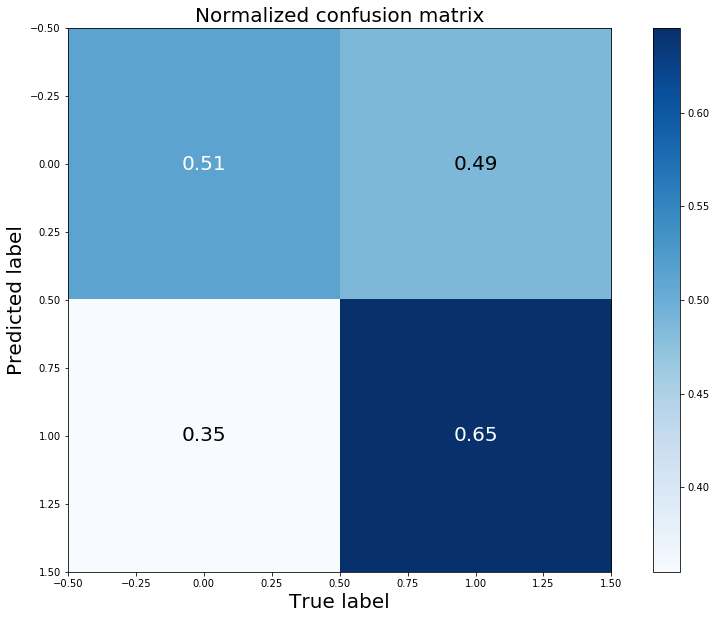

In [29]:
plt.figure(figsize = (15,10))

predicted_labels = model.predict(X_test)
cm = confusion_matrix(y_test, [np.round(i[0]) for i in predicted_labels])
print('Confusion matrix:\n',cm)

cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

plt.imshow(cm, cmap = plt.cm.Blues)
plt.title('Normalized confusion matrix', fontsize = 20)
plt.colorbar()
plt.xlabel('True label', fontsize = 20)
plt.ylabel('Predicted label', fontsize = 20)
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
             horizontalalignment = 'center', verticalalignment = 'center', fontsize = 20,
             color='white' if cm[i, j] > 0.5 else 'black')
plt.show()

In [30]:
scores = model.evaluate(X_test, y_test, verbose = 0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 57.95%
